<a href="https://colab.research.google.com/github/paulIruaRosero/Paul-Irua-Rosero-se-ales-y-sistemas/blob/main/C%C3%B3digo_parcial_2_de_se%C3%B1ales_y_sistemas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

grafica de la función del primer ejercicio:
$$
x(t) = \ |Asin(2πFot)|^{2}\\
$$
observese que se ingresó un valor arbitrario de A = 1 para darle forma a la función y para la frecuencia fundamental Fo = 2π

wo= 39.47841760435743
Fo= 62.01255336059963


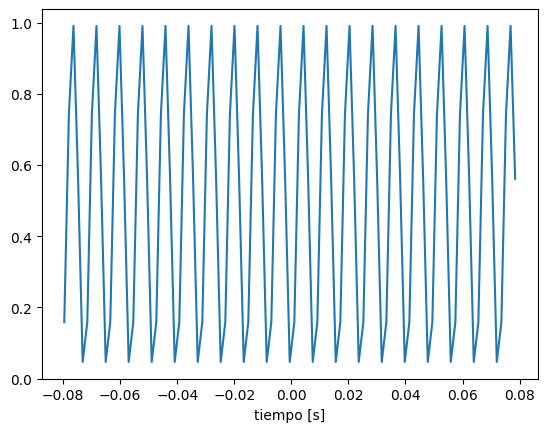

In [114]:

import numpy as np
import matplotlib.pyplot as plt

A = 1 #valor arbitrario de la amplitud de la señal asignada por el usuario para observar presentación en la simulación
Fo = 2*np.pi #frecuencia fundamental de la señal

ti = -1/(2*Fo) #tiempo inicial
tf = 1/(2*Fo) #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 10*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo

x = abs(A*np.sin(2*np.pi*Fo*tv))**2 #señal de entrada
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('')
plt.show()


vamos a realizar la simulación del segundo punto del parcial

Solución:

In [115]:
ti = -1/(2*Fo) #tiempo inicial
tf = 1/(2*Fo) #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental

Fs = 50*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(ti,tf,1/Fs) #vector de tiempo



T = tf - ti #intervalo de interés
N = 50 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

# graficar bases
from ipywidgets import interact,IntSlider

def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{Øn(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("Øn(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{Øn(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] = A**2 / 2 # nivel dc C_0
cn[N-2] = -A**2/4 #armónico -2
cn[N+2] = -A**2/4 #armónico +2


interactive(children=(IntSlider(value=1, description='n', max=50, min=-50), Output()), _dom_classes=('widget-i…

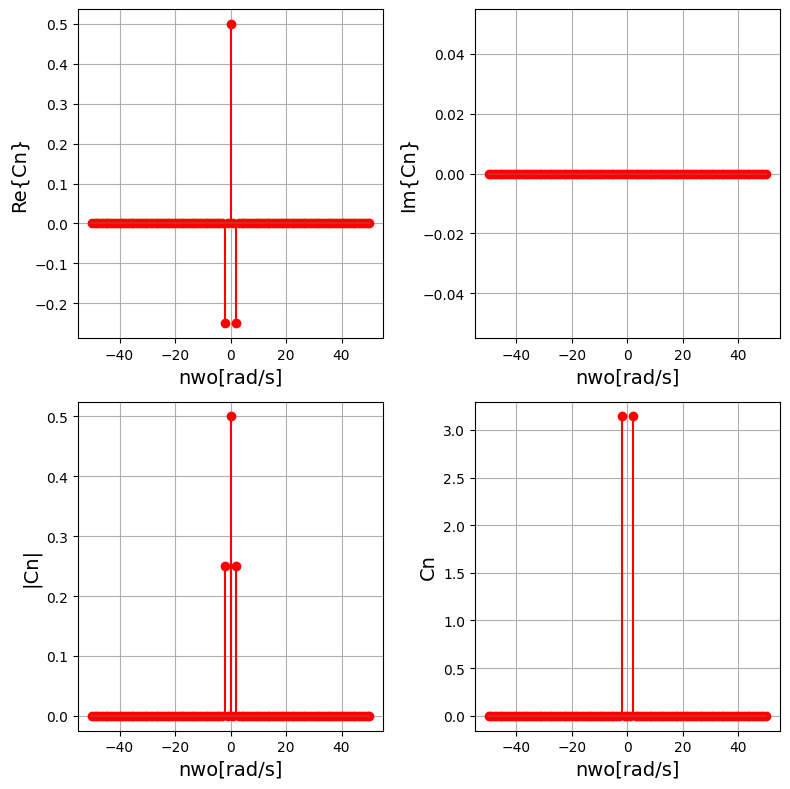

In [116]:
#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'nwo[rad/s]',fontsize = 14)
plt.ylabel(r'Re{Cn}',fontsize = 14)
plt.axis('tight')
plt.grid()


plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'nwo[rad/s]',fontsize = 14)
plt.ylabel(r'Im{Cn}',fontsize = 14)
plt.axis('tight')
plt.grid()


plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'nwo[rad/s]',fontsize = 14)
plt.ylabel(r'|Cn|',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'nwo[rad/s]',fontsize = 14)
plt.ylabel(r'Cn',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [ ]:
Px = (3*A**4)/2 # potencia señal x(t)
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='Xe(t)') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='x(t)') #señal original
    plt.title('E_r=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return

Vamos a realizar la simulación del tercer punto del parcial:

canción escogida para la simulación: The Black Eyed Peas - I Gotta Feeling

In [123]:
!pip install yt-dlp

In [124]:
link = "https://www.youtube.com/watch?v=9sg-A-eS6Ig&list=RDQMn6Nrqx1yoog&start_radio=1"
!yt-dlp --extract-audio --audio-format mp3 -o "audio.%(ext)s" {link}

[youtube] Extracting URL: https://www.youtube.com/watch?v=9sg-A-eS6Ig
[youtube] 9sg-A-eS6Ig: Downloading webpage
[youtube] 9sg-A-eS6Ig: Downloading ios player API JSON
[youtube] 9sg-A-eS6Ig: Downloading web creator player API JSON
[youtube] 9sg-A-eS6Ig: Downloading m3u8 information
[info] 9sg-A-eS6Ig: Downloading 1 format(s): 251
[download] audio.mp3 has already been downloaded
[ExtractAudio] Not converting audio audio.mp3; file is already in target format mp3


In [125]:
#convertir a .wav con ffmpeg para extraer audio en python
!ffmpeg -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [127]:
#instalar soundfile para cargar .wav
!pip install soundfile

In [128]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [129]:

xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal


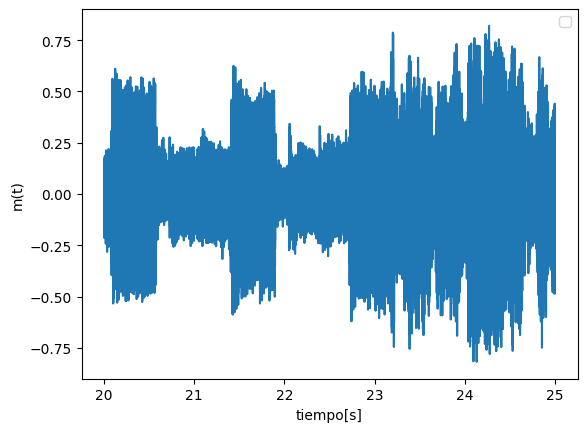

In [131]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('m(t)')
plt.legend()
plt.show()

In [132]:
Fc = 15000 #frecuencia portadora
Im = 0.5 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*tt) #portadora

In [133]:
#repoducir portadora
Audio(c,rate=fs)

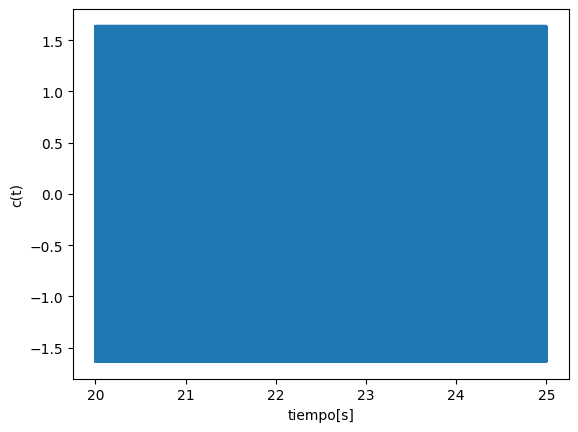

In [135]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('c(t)')
plt.show()

In [136]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

In [137]:
#repoducir modulada
Audio(y,rate=fs)

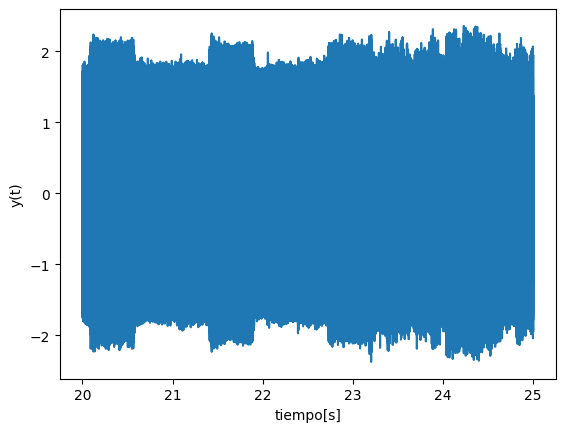

In [138]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('y(t)')
plt.show()